In [1]:
import plots
import prepare_data
import voronoi_analysis

In [50]:
import importlib
importlib.reload(voronoi_analysis)
#importlib.reload(plots)

<module 'voronoi_analysis' from 'c:\\Users\\marwa\\OneDrive\\Dokumenty\\GitHub\\solution_pipes_patterns\\voronoi_analysis.py'>

In [10]:
data_path="new_points.dat"
area_limit=14

In [11]:
data_path_random="new_points_random.dat"

In [51]:
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


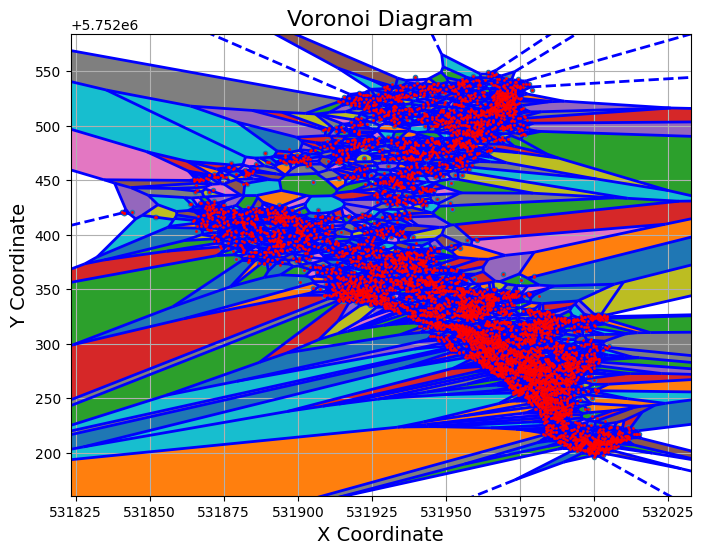

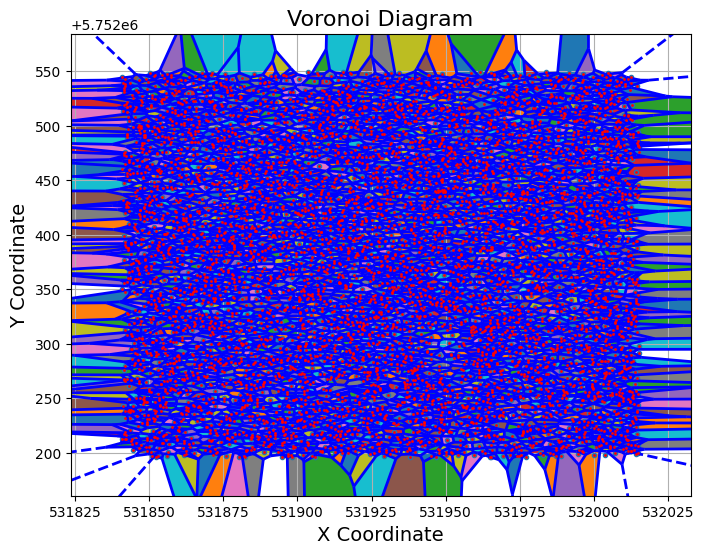

In [24]:
voronoi_plotter.all_voronoi_diagram()
voronoi_plotter_random.all_voronoi_diagram()

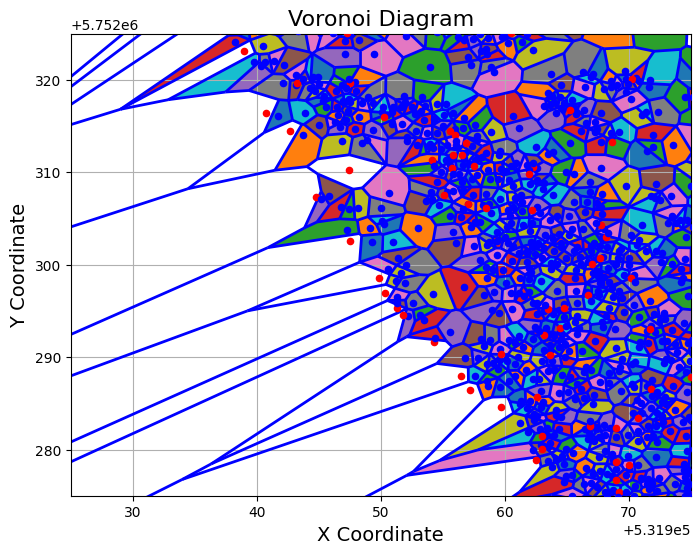

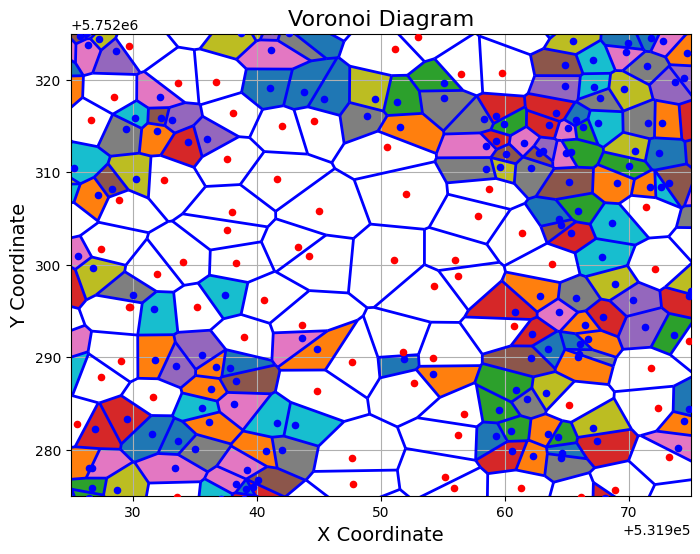

In [25]:
voronoi_plotter.all_voronoi_diagram_area_filtered(area_limit)
voronoi_plotter_random.all_voronoi_diagram_area_filtered(area_limit)

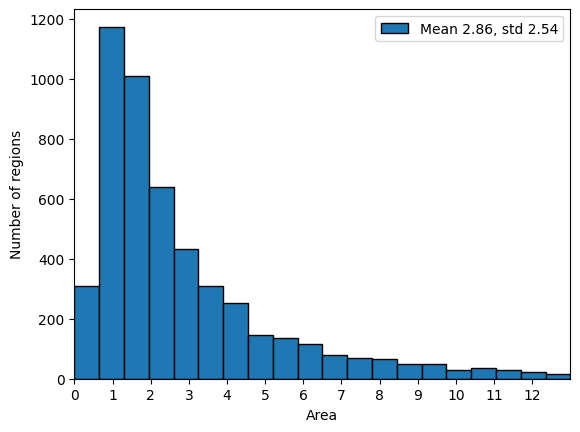

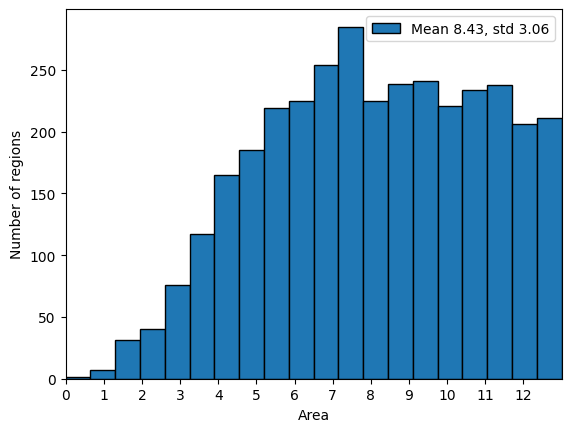

In [17]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

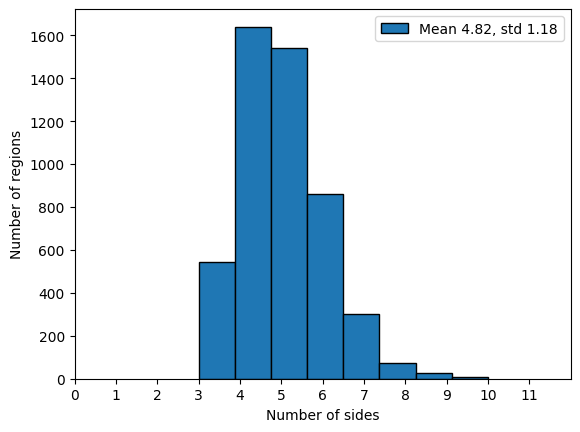

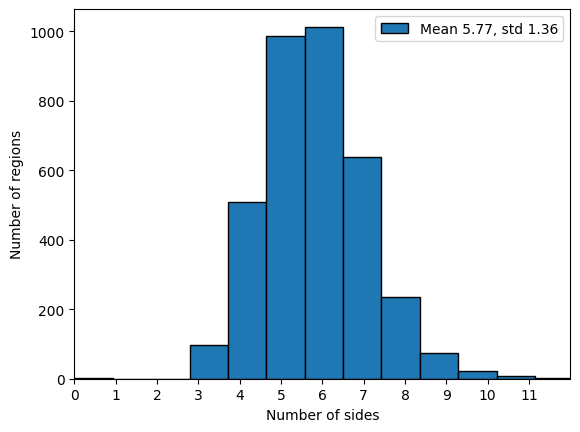

In [24]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

In [25]:
print(len(sides))

4992


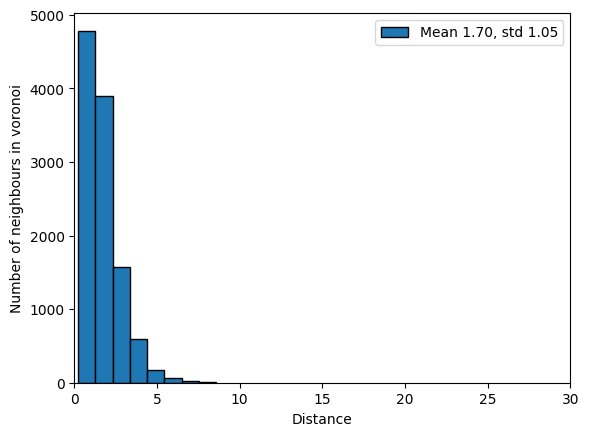

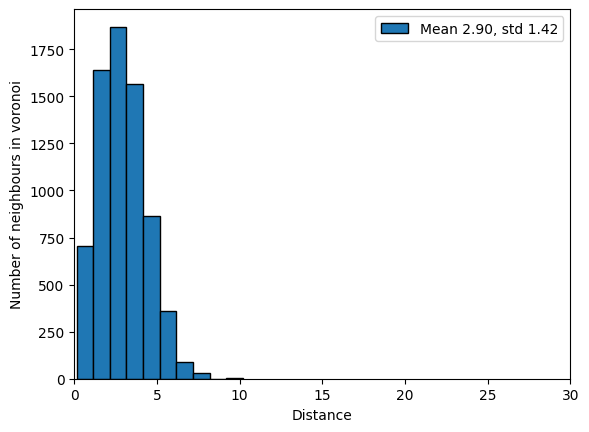

In [20]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

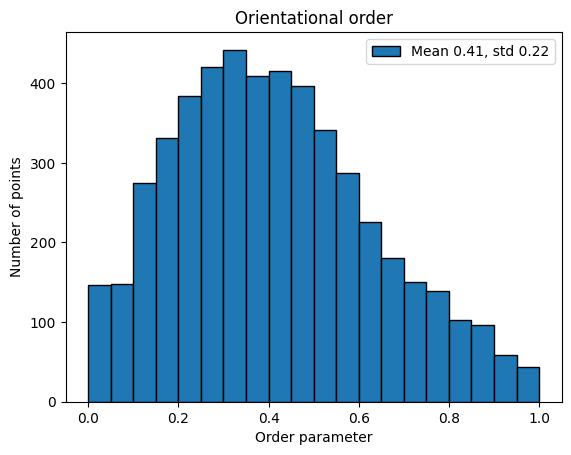

In [52]:
updated_df = voronoi_analyser.calculate_orientational_order()
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

In [53]:
updated_df


,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,1.823,531900.109,5752410.439,1.0,1.950,1555.0,0.478903
1,1.801,531899.516,5752408.933,1.0,1.993,913.0,0.365928
2,1.977,531900.725,5752409.331,1.0,2.908,912.0,0.223953
3,0.966,531899.302,5752410.243,1.0,2.871,2490.0,0.308868
4,1.296,531898.673,5752408.901,1.0,4.043,597.0,0.846400
...,...,...,...,...,...,...,...
5536,1.644,531959.005,5752540.772,1.0,6.330,698.0,0.309829
5537,2.055,531961.248,5752540.864,1.0,5.542,358.0,0.273973
5538,1.096,531966.830,5752547.684,0.0,685.006,144.0,0.000000
5539,1.507,531940.108,5752515.039,1.0,7.038,2806.0,0.049238


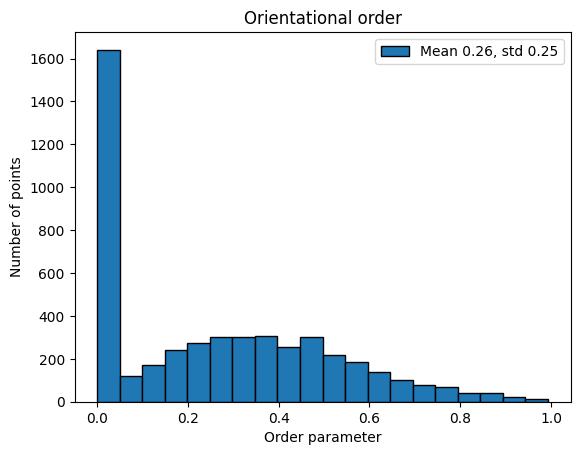

In [54]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order()
order_random=updated_df_random.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

In [55]:
print(len(order))

4992
